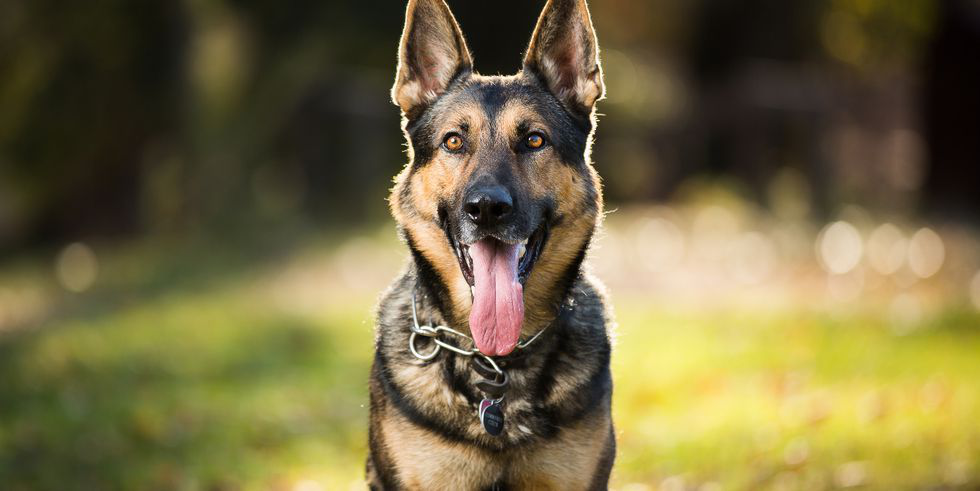

(491, 980, 3)

In [56]:
# Syntax: cv2.imread(path, flag)

# Parameters:
# path: A string representing the path of the image to be read.
# flag: It specifies the way in which image should be read. It’s default value is cv2.IMREAD_COLOR

# Return Value: This method returns an image that is loaded from the specified file.

# For color conversion, we use the function cv2. cvtColor(input_image, flag) where flag determines the type of conversion. For BGR Gray conversion we use the flags cv2.COLOR_BGR2GRAY 

import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

url= ('https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/smartest-dog-breeds-1553287693.jpg')

dog_img = io.imread(url)
clr_dog = cv.cvtColor(dog_img,cv.COLOR_BGR2RGB)
cv2_imshow(clr_dog)

c_mat= np.array(list(clr_dog),float)
c_mat.shape

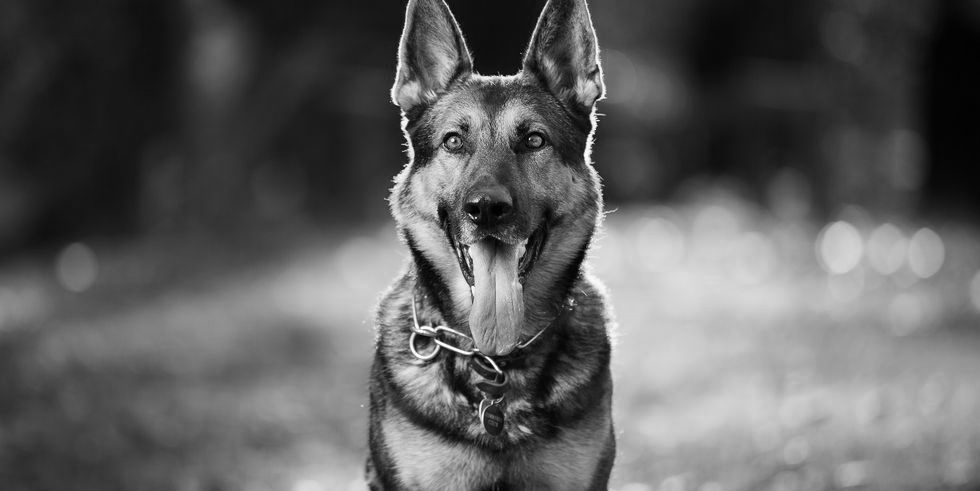

(491, 980)

In [ ]:
#@title
gray_dimg = cv.cvtColor(dog_img,cv.COLOR_BGR2GRAY)
cv2_imshow(gray_dimg)
d_mat = np.array(list(gray_dimg),float)
d_mat.shape

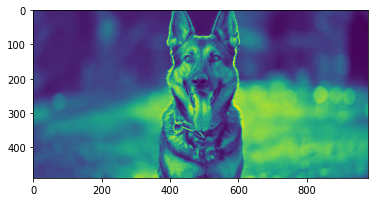

In [ ]:
plt.imshow(d_mat)

In [48]:
#scaling
d_mat_scl = (d_mat - d_mat.mean())/d_mat.std()

#SVD
U,s,V =  np.linalg.svd(d_mat)

# Compute Variance explained by each singular vector
var_e = np.round(s**2/np.sum(s**2), decimals=3)
print(U.shape)
print(s.shape)
print(V.shape)

(491, 491)
(491,)
(980, 980)


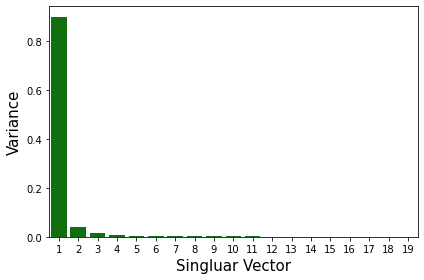

In [ ]:
import seaborn as sns
sns.barplot(x=list(range(1,20)),
            y=var_e[0:19],color="green")
plt.xlabel('Singluar Vector',fontsize=15)
plt.ylabel('Variance',fontsize=15)
plt.tight_layout()
plt.savefig('svd_scree_plot.png',dpi=200, figsize=(12,10))

481180

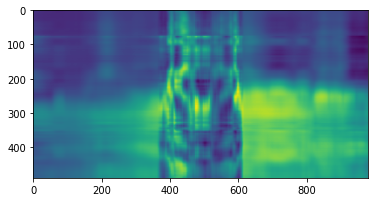

In [47]:
#Reconstruction with top 5 singular values
num_components = 5
r_dimg_5 = np.array(U[:, :num_components]) .dot(np.diag(s[:num_components]).dot(
                np.array(V[:num_components, :])))
plt.imshow(r_dimg_5)
r_dimg_5.size


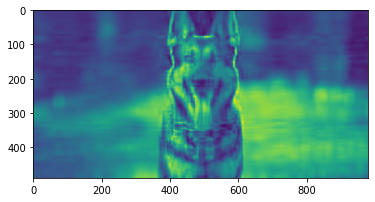

In [ ]:
#Reconstruction with top 15 singular values
num_components = 15
r_dimg_15 = np.array(U[:, :num_components]) .dot(np.diag(s[:num_components]).dot(
                np.array(V[:num_components, :])))
plt.imshow(r_dimg_15)


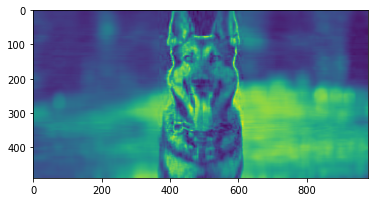

In [ ]:
#Reconstruction with top 20 singular values
num_components = 20
r_dimg_20 = np.array(U[:, :num_components]) .dot(np.diag(s[:num_components]).dot(
                np.array(V[:num_components, :])))
plt.imshow(r_dimg_20)

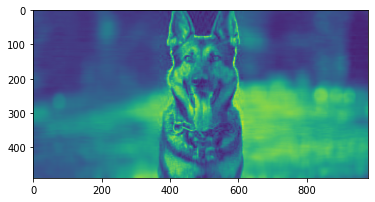

In [49]:
#Reconstruction with top 30 singular values
num_components = 30
r_dimg_30 = np.array(U[:, :num_components]) .dot(np.diag(s[:num_components]).dot(
                np.array(V[:num_components, :])))
plt.imshow(r_dimg_30)

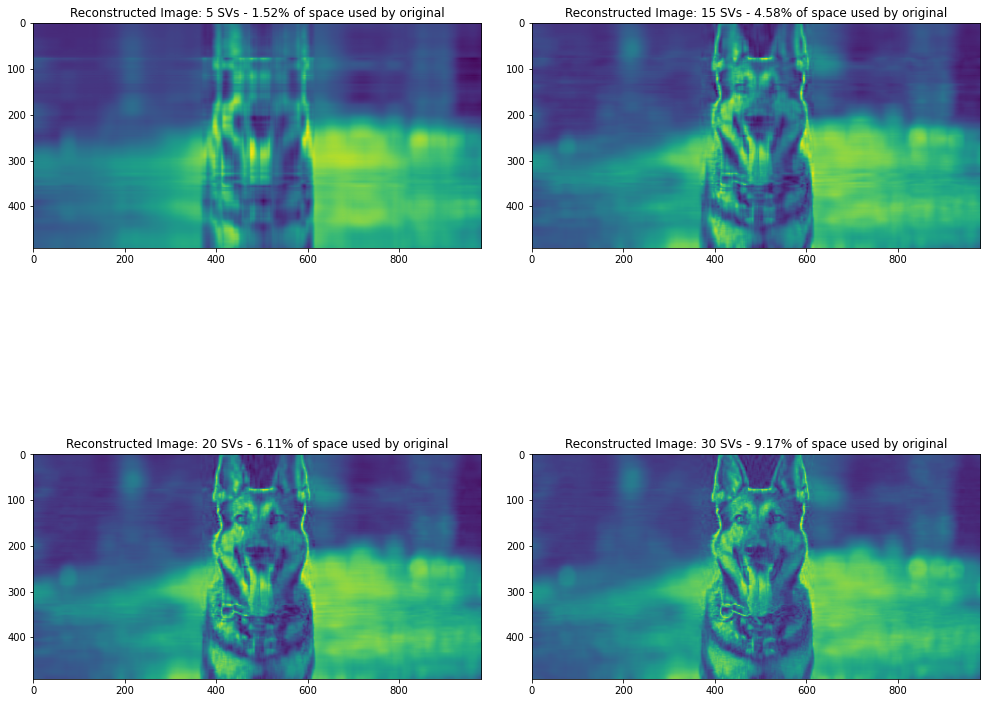

In [55]:
fig, axs = plt.subplots(2, 2,figsize=(14,14))
axs[0, 0].imshow(r_dimg_5)
axs[0, 0].set_title('Reconstructed Image: 5 SVs - 1.52% of space used by original', size=12)
axs[0, 1].imshow(r_dimg_15)
axs[0, 1].set_title('Reconstructed Image: 15 SVs - 4.58% of space used by original', size=12)
axs[1, 0].imshow(r_dimg_20)
axs[1, 0].set_title('Reconstructed Image: 20 SVs - 6.11% of space used by original', size=12)
axs[1, 1].imshow(r_dimg_30)
axs[1, 1].set_title('Reconstructed Image: 30 SVs - 9.17% of space used by original', size=12)
plt.tight_layout()